## **Notebook EC#07 - Part 1**
## Autoencoder training and manifold visualization for the MNIST database.
## Partially based on [this material](https://www.kaggle.com/apapiu/manifold-learning-and-autoencoders).

**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula

### Loading the main libraries

In [2]:
import tensorflow as tf
import os

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from keras.utils import to_categorical

### Reading the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_images = x_train.reshape(x_train.shape[0], 28, 28)

In [5]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

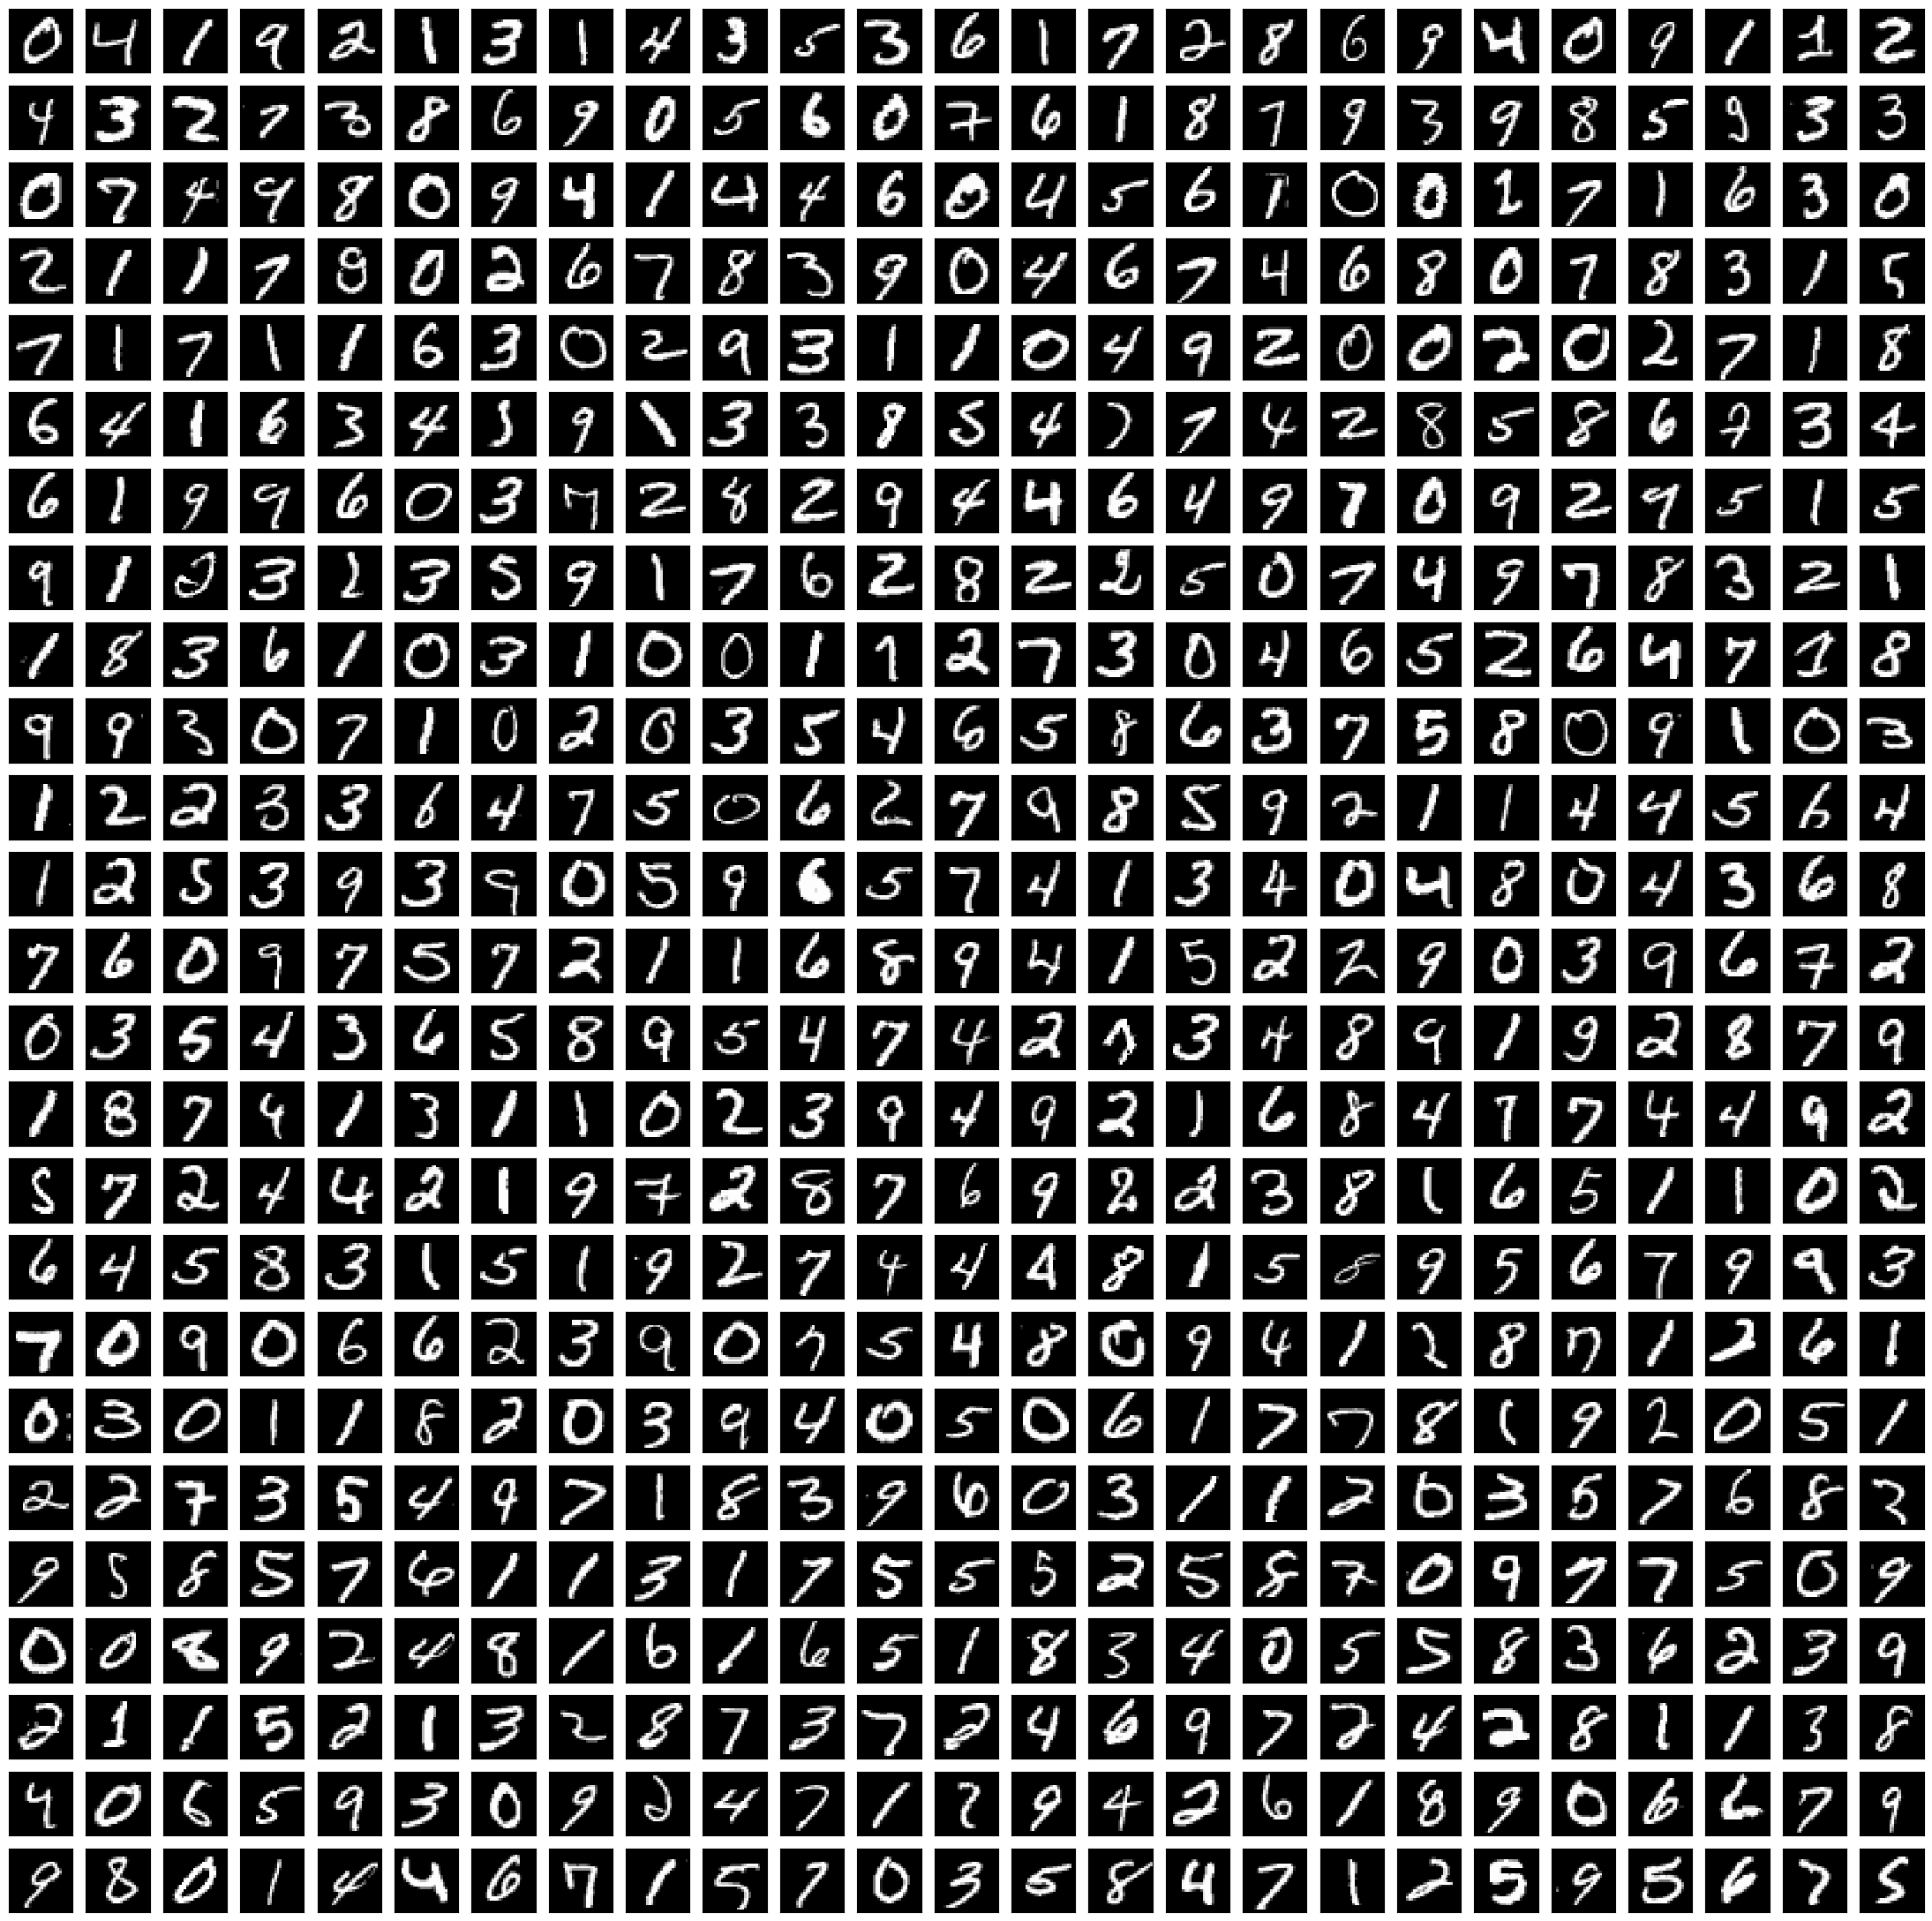

In [6]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(x_images[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### Proposal for the autoencoder architecture

In [7]:
input_img = Input(shape=(784,))

encoded = Dense(512, activation='tanh')(input_img)
encoded = Dense(128, activation='tanh')(encoded)
encoded = Dense(32, activation='tanh')(encoded)

encoded = Dense(2)(encoded) # Linear activation function at the bottleneck

decoded = Dense(32, activation='tanh')(encoded)
decoded = Dense(128, activation='tanh')(decoded)
decoded = Dense(512, activation='tanh')(decoded)

decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 944,338 (3.60 MB)

 Trainable params: 944,338 (3.60 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
autoencoder.compile(optimizer = "adam", loss = "mse")
X = x_train.reshape(x_train.shape[0], 784)
history = autoencoder.fit(X, X, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0787
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0505
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0444
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0415
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0398
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0390
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0381
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0377
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0371
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0368
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0363
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0360
Epoch 13/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0357
Epoch 14/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0356
Epoch 15/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - lo

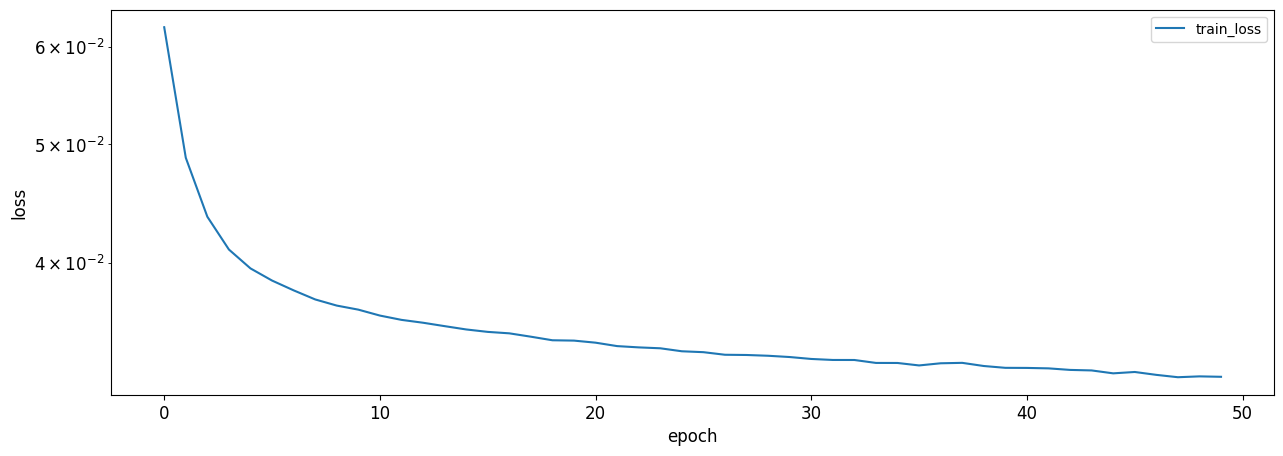

In [9]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

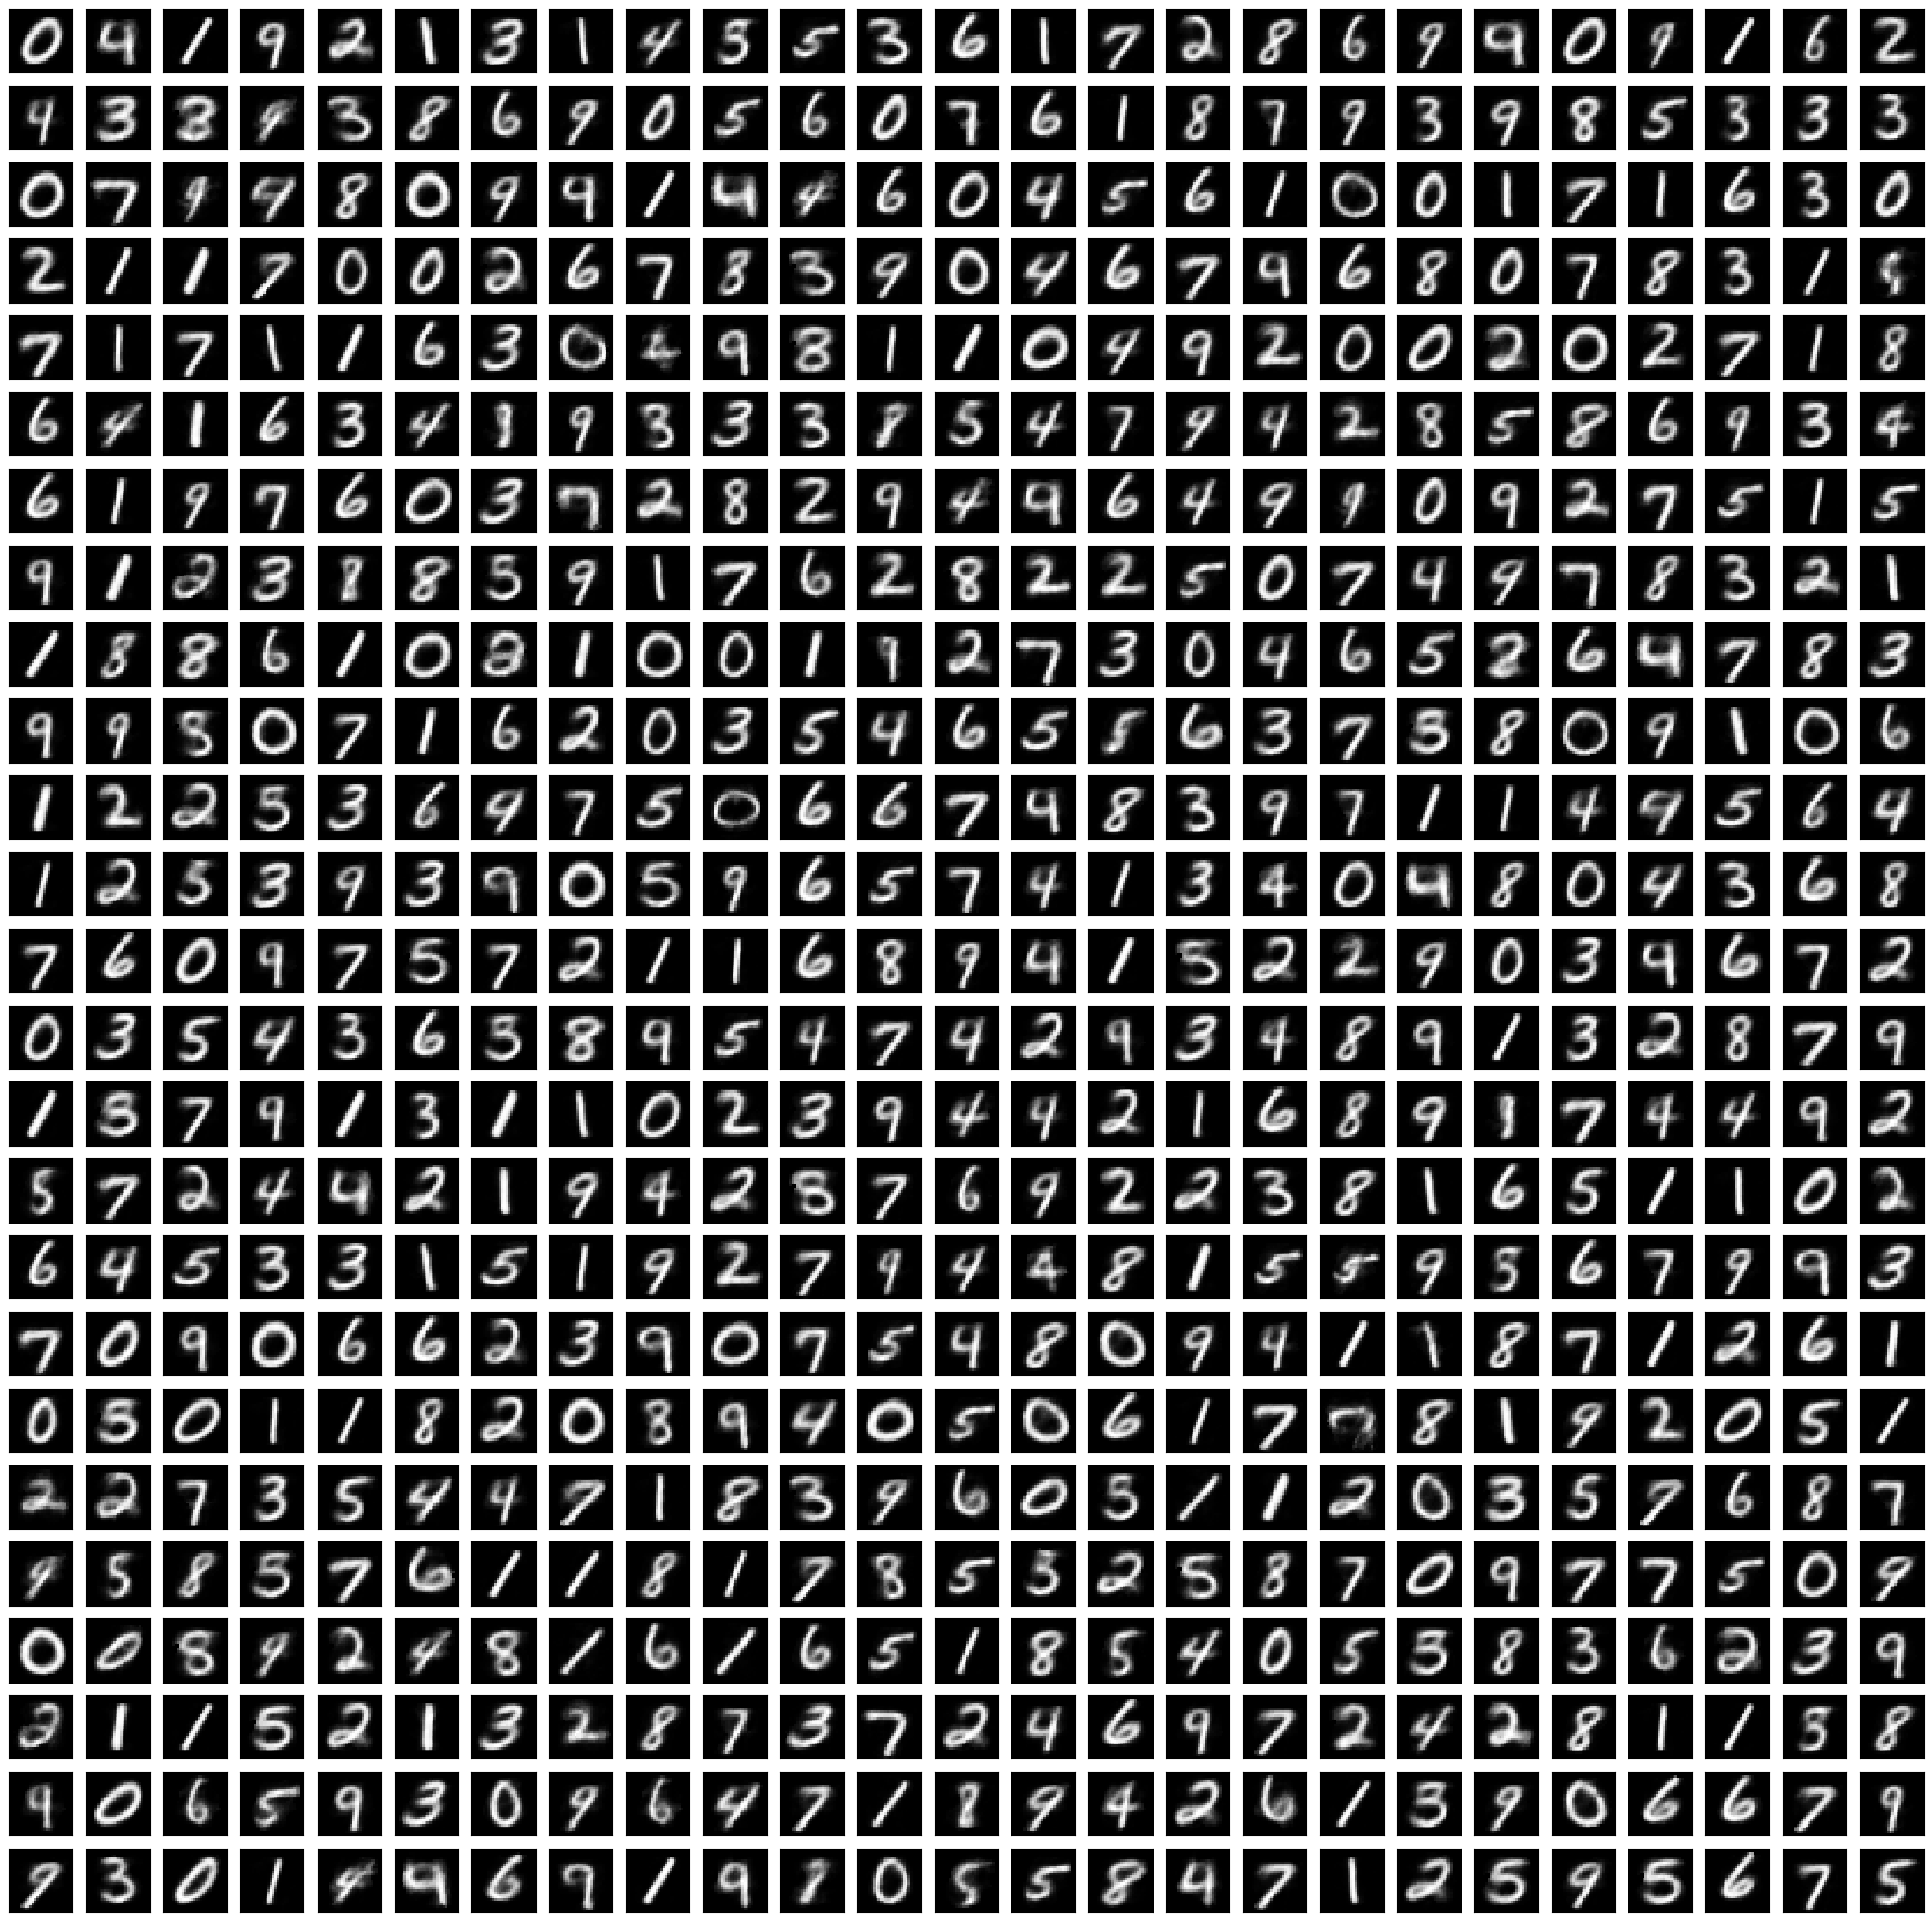

In [10]:
# Visualization of 25 x 25 reconstructed images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(autoencoder.predict(np.expand_dims(x_images[ind].flatten(), 0), verbose = False).reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [11]:
encoder = Model(input_img, encoded)

# Building the decoder
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-4]
encoded_layer_2 = autoencoder.layers[-3]
encoded_layer_3 = autoencoder.layers[-2]
encoded_layer_4 = autoencoder.layers[-1]

decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = encoded_layer_3(decoder)
decoder = encoded_layer_4(decoder)
decoder = Model(encoded_input, decoder)

### Visualizing the images in the manifold

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


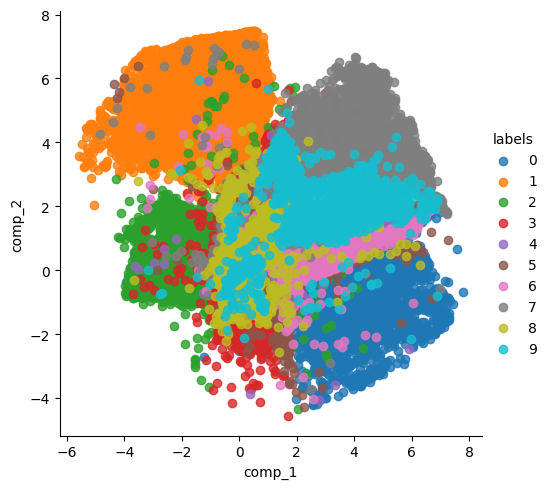

In [12]:
# Using encoder to visualize the manifold

import seaborn as sns

x_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

x_proj = encoder.predict(x_flat[:60000])
x_proj.shape

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:60000]
sns.lmplot(x = "comp_1", y = "comp_2", hue="labels", data=proj, fit_reg=False, logx = True)

### Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

### Moving along a circle

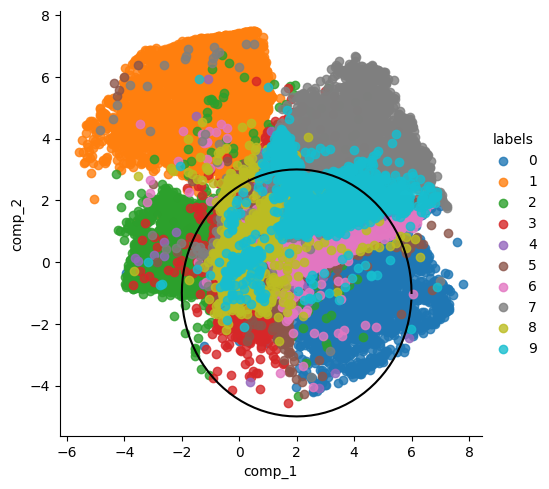

In [13]:
_ = sns.lmplot(x = "comp_1", y = "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [4 * np.cos(2 * np.pi / 100 * i) + 2 for i in range(100)]
all_y = [4 * np.sin(2 * np.pi / 100 * i) - 1 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

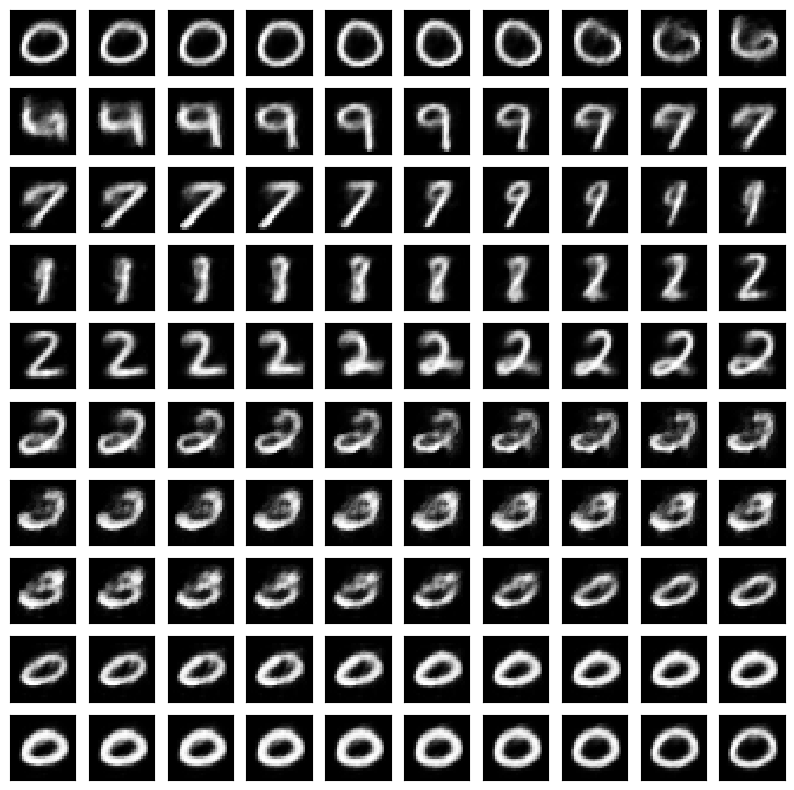

In [14]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)

    x = 4 * np.cos(2 * np.pi / 100 * i) + 2
    y = 4 * np.sin(2 * np.pi / 100 * i) - 1

    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt, verbose = False).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along an ellipse

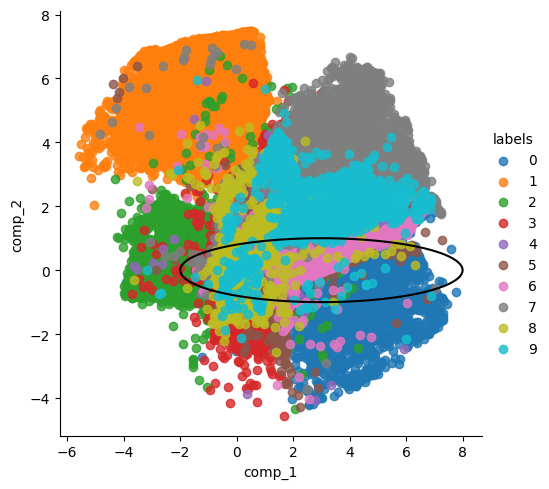

In [15]:
_ = sns.lmplot(x = "comp_1", y = "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [5 * np.cos(2 * np.pi / 100 * i) + 3 for i in range(100)]
all_y = [1 * np.sin(2 * np.pi / 100 * i) + 0 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

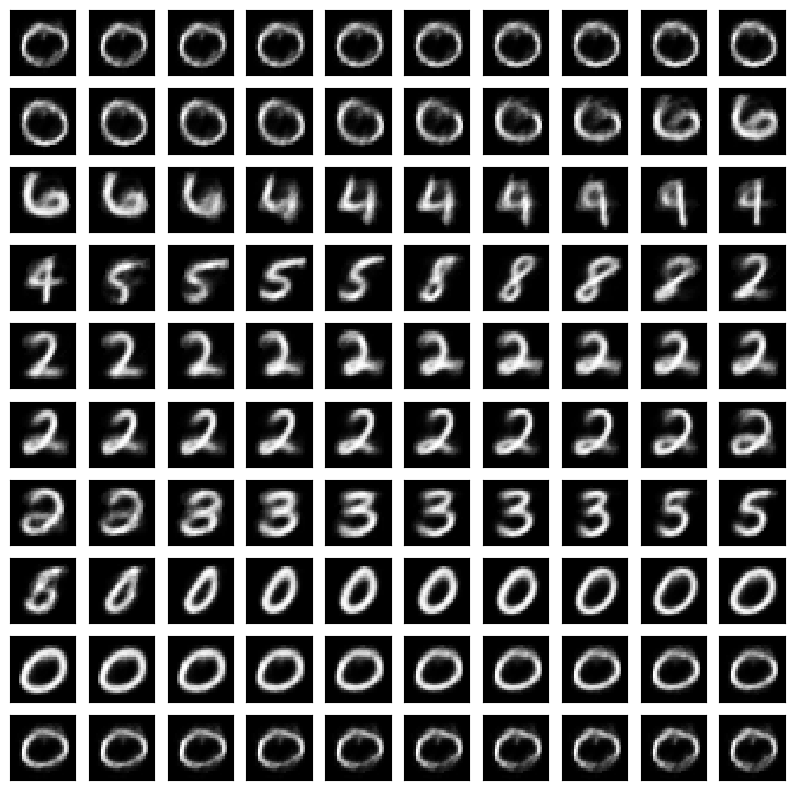

In [16]:
# Moving along an ellipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)

    x = 5 * np.cos(2 * np.pi / 100 * i) + 3
    y = 1 * np.sin(2 * np.pi / 100 * i) + 0

    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt, verbose = False).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along a grid

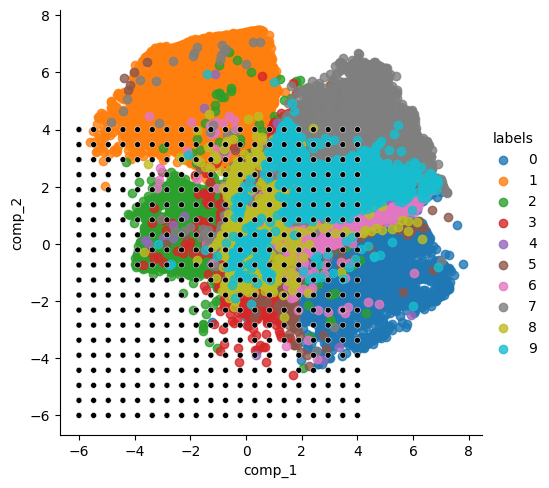

In [17]:
pt_x = []
pt_y = []
for i in range(20):
    for j in range(20):
        pt_x.append(-6 + 10 * i / 19)
        pt_y.append(-6 + 10 * j / 19)
_ = sns.lmplot(x = "comp_1", y = "comp_2", hue="labels", data=proj, fit_reg=False)
_ = sns.scatterplot(x = pt_x,y = pt_y, color = 'black', size = 0.5, legend = False )

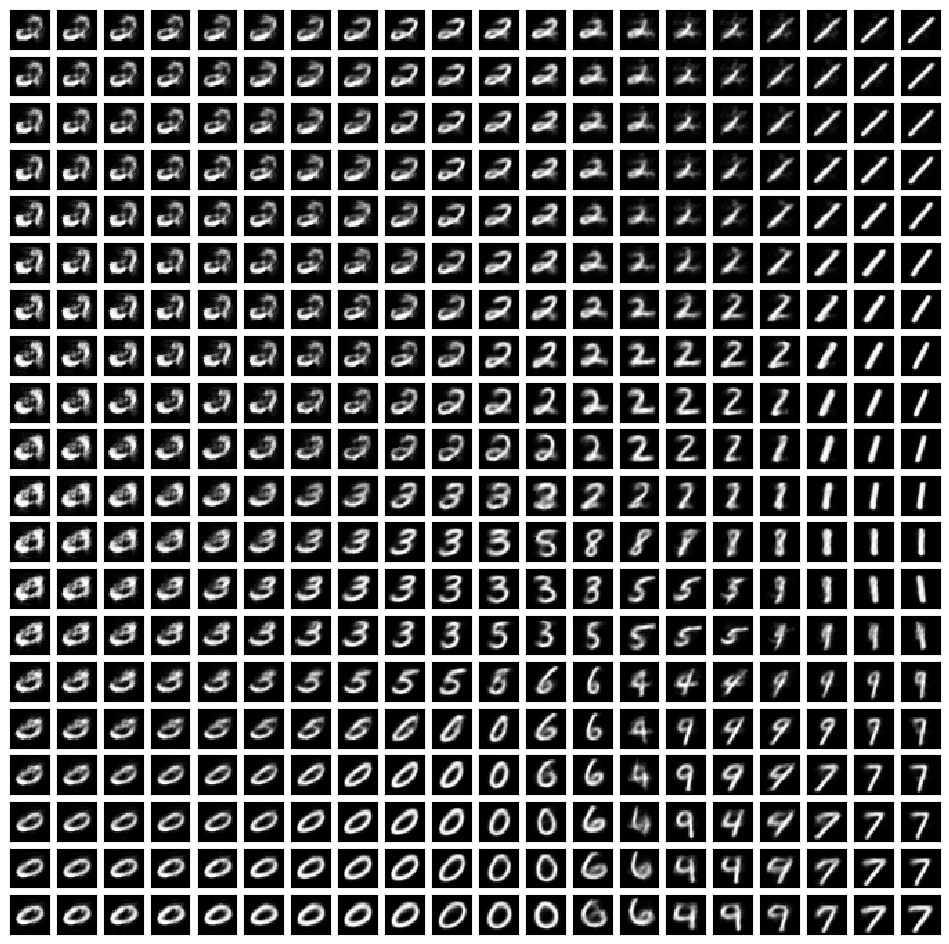

In [18]:
# Moving along a grid:
_ = plt.figure(figsize=(12, 12))

for i in range(20):
    for j in range(20):

        _ = plt.subplot(20, 20, i * 20 + j + 1)

        pt = np.array([[ -6 + 10 * i / 19, -6 + 10 * j / 19]])
        _ = show(decoder.predict(pt, verbose = False).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])